In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
Z=pd.read_csv(r"C:\Users\ritik\Downloads\nasa\og\nasa.csv")

In [5]:
##to remove label from features
Z.drop(['Hazardous'], axis = 1) 

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000


removing 20th and 37th coulum because full coulum has same value which is not gonna affect our prediction

In [6]:
Z = Z.drop(Z.columns[[20]], axis=1)

In [7]:
Z = Z.drop(Z.columns[[37]], axis=1)

creating a label array y

In [8]:
y = Z['Hazardous']

#checking if y works

In [9]:
y.head()

0     True
1    False
2     True
3    False
4     True
Name: Hazardous, dtype: bool

37th coulum is our label, so removing it from Z

In [10]:
Z = Z.drop(Z.columns[[37]], axis=1)

In [11]:
##0th and 1st coulum are just names so they wont affect data, and 19th is just orbit_id which should also not affect the data
Z = Z.drop(Z.columns[[0, 1, 19 ]], axis=1)

checking if everything is fine in Z

In [12]:
Z.iloc[0,:]

Absolute Magnitude                             21.6
Est Dia in KM(min)                          0.12722
Est Dia in KM(max)                         0.284472
Est Dia in M(min)                            127.22
Est Dia in M(max)                           284.472
Est Dia in Miles(min)                     0.0790507
Est Dia in Miles(max)                      0.176763
Est Dia in Feet(min)                        417.388
Est Dia in Feet(max)                        933.308
Close Approach Date                      1995-01-01
Epoch Date Close Approach              788947200000
Relative Velocity km per sec                6.11583
Relative Velocity km per hr                   22017
Miles per hour                              13680.5
Miss Dist.(Astronomical)                   0.419483
Miss Dist.(lunar)                           163.179
Miss Dist.(kilometers)                  6.27537e+07
Orbit ID                                         17
Orbit Determination Date        2017-04-06 08:36:37
Orbit Uncert

changing string into date and time format

In [13]:
Z['Close Approach Date'] = pd.to_datetime(Z['Close Approach Date'])

In [14]:
Z['Orbit Determination Date'] = pd.to_datetime(Z['Orbit Determination Date'])

In [15]:
from fastai.tabular import add_datepart

In [16]:
import torch
from pandas.api.types import is_numeric_dtype
from datetime import date, datetime
import calendar

this add_datepart function makes divides date into many different coulums

In [17]:
add_datepart(Z,'Close Approach Date')

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,...,Close Approach Day,Close Approach Dayofweek,Close Approach Dayofyear,Close Approach Is_month_end,Close Approach Is_month_start,Close Approach Is_quarter_end,Close Approach Is_quarter_start,Close Approach Is_year_end,Close Approach Is_year_start,Close Approach Elapsed
0,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,...,1,6,1,False,True,False,True,False,True,788918400
1,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,788947200000,...,1,6,1,False,True,False,True,False,True,788918400
2,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,789552000000,...,8,6,8,False,False,False,False,False,False,789523200
3,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,790156800000,...,15,6,15,False,False,False,False,False,False,790128000
4,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,790156800000,...,15,6,15,False,False,False,False,False,False,790128000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,1473318000000,...,8,3,252,False,False,False,False,False,False,1473292800
4683,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,1473318000000,...,8,3,252,False,False,False,False,False,False,1473292800
4684,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,1473318000000,...,8,3,252,False,False,False,False,False,False,1473292800
4685,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,851.187094,1473318000000,...,8,3,252,False,False,False,False,False,False,1473292800


In [18]:
add_datepart(Z,'Orbit Determination Date')

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,...,Orbit Determination Day,Orbit Determination Dayofweek,Orbit Determination Dayofyear,Orbit Determination Is_month_end,Orbit Determination Is_month_start,Orbit Determination Is_quarter_end,Orbit Determination Is_quarter_start,Orbit Determination Is_year_end,Orbit Determination Is_year_start,Orbit Determination Elapsed
0,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,...,6,3,96,False,False,False,False,False,False,1491467797
1,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,788947200000,...,6,3,96,False,False,False,False,False,False,1491467569
2,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,789552000000,...,6,3,96,False,False,False,False,False,False,1491470419
3,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,790156800000,...,6,3,96,False,False,False,False,False,False,1491470149
4,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,790156800000,...,6,3,96,False,False,False,False,False,False,1491469078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,1473318000000,...,6,3,96,False,False,False,False,False,False,1491467047
4683,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,1473318000000,...,6,3,96,False,False,False,False,False,False,1491467038
4684,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,1473318000000,...,6,3,96,False,False,False,False,False,False,1491467023
4685,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,851.187094,1473318000000,...,6,3,96,False,False,False,False,False,False,1491467022


making traing and test sets of our data

In [19]:
from sklearn.model_selection import train_test_split
Z_train, Z_test, y_train, y_test = train_test_split(Z, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [20]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(Z_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
y_pred = svclassifier.predict(Z_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[983   0]
 [189   0]]
              precision    recall  f1-score   support

       False       0.84      1.00      0.91       983
        True       0.00      0.00      0.00       189

    accuracy                           0.84      1172
   macro avg       0.42      0.50      0.46      1172
weighted avg       0.70      0.84      0.77      1172



c:\users\ritik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from collections import Counter
Counter(y_train)
Counter(y_test)

Counter({False: 983, True: 189})

In [24]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

from pandas.plotting import parallel_coordinates

c:\users\ritik\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [25]:
df=pd.read_csv(r"C:\Users\ritik\Downloads\nasa\og\nasa.csv", delimiter=',')

In [26]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [44]:
g=df['Orbital Period'];
q=df['Perihelion Time'];
h=df['Orbit Uncertainity'];
e=y

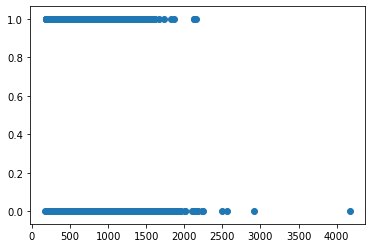

In [45]:
plt.scatter(g,e)

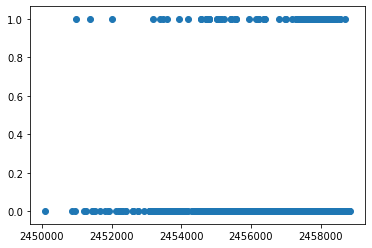

In [46]:
plt.scatter(q,e)

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

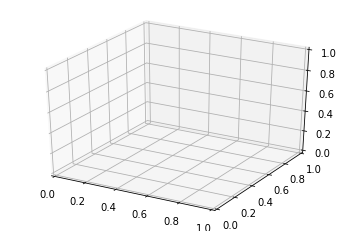

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

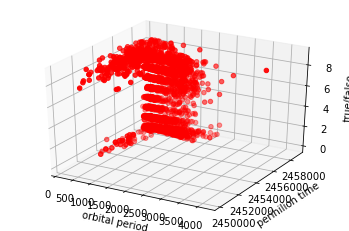

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(g, q, h, c='r', marker='o', facecolors=cm.Oranges(y))

ax.set_xlabel('orbital period')
ax.set_ylabel('perihilion time')
ax.set_zlabel('true/false')

plt.show()

in the following 
g=Orbital Period
q=Perihelion Time
h=Orbit Uncertainity
e=y

In [47]:
#getting 4th dimensional plot
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(
    x=g,
    y=h,
    z=q,
    mode='markers',
    marker=dict(
        size=12,
        color=e*200,                # set color to e, now there was not much differnce in 0 and 1 so to fix it i multiplied with 200
        colorscale='Viridis',   # choose a colorscale named Viridis
        opacity=0.8
    )
)])

fig.show()

Note: you may need to restart the kernel to use updated packages.
